# Milk Quality Prediction using Linear Regression, Logistics Regression, SVM, Naive Bayes and kNN

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data acquistion

In [2]:
#load dataset
data= pd.read_csv('milknew.csv')

In [3]:
#read the data
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Percentage of Quality,Grade I
0,6.0,35.0,1,0,1,0,254.0,high,0.80,High
1,NaN,36.0,0,1,0,1,253.0,high,0.65,High
2,8.5,70.0,1,1,1,1,246.0,low,0.25,Low
3,9.5,34.0,1,1,0,1,NaN,low,0.30,Low
4,NaN,37.0,0,0,0,0,NaN,medium,0.50,Low
...,...,...,...,...,...,...,...,...,...,...
1054,6.7,45.0,1,1,0,0,247.0,medium,0.50,Low
1055,6.7,NaN,1,0,1,0,255.0,high,0.80,High
1056,3.0,NaN,1,1,1,1,250.0,low,0.25,Low
1057,6.8,43.0,1,0,1,0,250.0,high,0.85,High


# All information about dataset

In [4]:
#shape of the data i.e no. of rows and columns
data.shape

(1059, 10)

In [5]:
# top 10 rows
data.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Percentage of Quality,Grade I
0,6.0,35.0,1,0,1,0,254.0,high,0.80,High
1,NaN,36.0,0,1,0,1,253.0,high,0.65,High
2,8.5,70.0,1,1,1,1,246.0,low,0.25,Low
3,9.5,34.0,1,1,0,1,NaN,low,0.30,Low
4,NaN,37.0,0,0,0,0,NaN,medium,0.50,Low
5,NaN,37.0,1,1,1,1,NaN,high,0.85,High
6,5.5,45.0,1,0,1,1,250.0,low,0.25,Low
7,4.5,60.0,0,1,1,1,250.0,low,0.40,Low
8,8.1,66.0,1,0,1,1,NaN,low,0.25,Low
9,6.7,45.0,1,1,0,0,247.0,medium,0.50,Low


In [6]:
# bottom 10 rows
data.tail(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Percentage of Quality,Grade I
1049,6.5,37.0,0,0,0,0,NaN,medium,0.50,Low
1050,NaN,37.0,1,1,1,1,NaN,high,0.75,High
1051,5.5,45.0,1,0,1,1,250.0,low,0.25,Low
1052,6.5,NaN,1,0,0,0,250.0,medium,0.50,Low
1053,8.1,66.0,1,0,1,1,NaN,low,0.25,Low
1054,6.7,45.0,1,1,0,0,247.0,medium,0.50,Low
1055,6.7,NaN,1,0,1,0,255.0,high,0.80,High
1056,3.0,NaN,1,1,1,1,250.0,low,0.25,Low
1057,6.8,43.0,1,0,1,0,250.0,high,0.85,High
1058,8.6,55.0,0,1,1,1,255.0,low,0.25,Low


In [7]:
# describe :count,max,min
data.describe(include='all')

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Percentage of Quality,Grade I
count,901.000000,748.000000,1059.000000,1059.000000,1059.000000,1059.000000,434.000000,1059,1059.000000,1059
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN,Low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429,NaN,802
mean,6.634739,46.462567,0.546742,0.432483,0.671388,0.491029,247.278802,NaN,0.461615,NaN
std,1.517660,11.268534,0.498046,0.495655,0.469930,0.500156,3.170762,NaN,0.198784,NaN
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,NaN,0.200000,NaN
25%,6.500000,37.000000,0.000000,0.000000,0.000000,0.000000,245.000000,NaN,0.250000,NaN
50%,6.800000,45.000000,1.000000,0.000000,1.000000,0.000000,247.000000,NaN,0.500000,NaN
75%,6.800000,50.000000,1.000000,1.000000,1.000000,1.000000,250.000000,NaN,0.500000,NaN


In [8]:
#it will display information about that object, including its data type, attributes, and methods, if available. 
#This information is provided interactively to help you understand the object better.
data.info

<bound method DataFrame.info of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade  \
0     6.0        35.0      1     0     1          0   254.0    high   
1     NaN        36.0      0     1     0          1   253.0    high   
2     8.5        70.0      1     1     1          1   246.0     low   
3     9.5        34.0      1     1     0          1     NaN     low   
4     NaN        37.0      0     0     0          0     NaN  medium   
...   ...         ...    ...   ...   ...        ...     ...     ...   
1054  6.7        45.0      1     1     0          0   247.0  medium   
1055  6.7         NaN      1     0     1          0   255.0    high   
1056  3.0         NaN      1     1     1          1   250.0     low   
1057  6.8        43.0      1     0     1          0   250.0    high   
1058  8.6        55.0      0     1     1          1   255.0     low   

      Percentage of Quality Grade I  
0                      0.80    High  
1                      0.65    High  
2

In [9]:
#it provides a concise summary of the DataFrame's structure,
#including the number of non-null values, data types of columns, and memory usage. 
#It's a useful method for quickly assessing the basic characteristics of your data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pH                     901 non-null    float64
 1   Temprature             748 non-null    float64
 2   Taste                  1059 non-null   int64  
 3   Odor                   1059 non-null   int64  
 4   Fat                    1059 non-null   int64  
 5   Turbidity              1059 non-null   int64  
 6   Colour                 434 non-null    float64
 7   Grade                  1059 non-null   object 
 8   Percentage of Quality  1059 non-null   float64
 9   Grade I                1059 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 82.9+ KB


In [10]:
#any null value present
data.isnull().values.any()

True

In [11]:
# check the null values entirely present in the dataset
data.isnull()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Percentage of Quality,Grade I
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1054,False,False,False,False,False,False,False,False,False,False
1055,False,True,False,False,False,False,False,False,False,False
1056,False,True,False,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False,False,False,False


In [12]:
# number of null values in each column
data.isnull().sum()

pH                       158
Temprature               311
Taste                      0
Odor                       0
Fat                        0
Turbidity                  0
Colour                   625
Grade                      0
Percentage of Quality      0
Grade I                    0
dtype: int64

<Axes: >

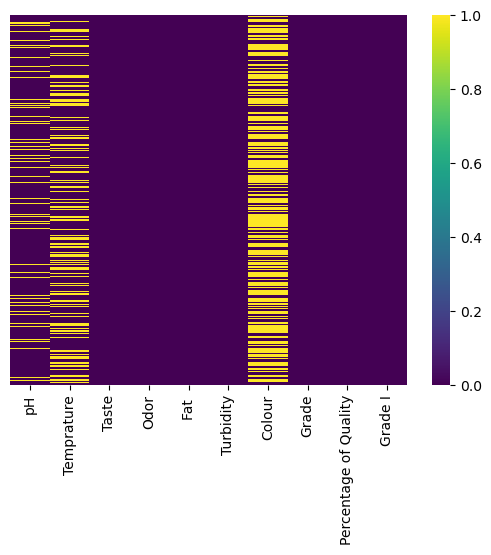

In [13]:
# to illustrate null values using heatmap
sns.heatmap(data.isnull(), yticklabels=False,cmap='viridis')

# Treating Missing values

In [14]:
#filling missing values using bfill, ffill, fillna
data['Colour'].bfill(axis=0, inplace=True)
data['Temprature']=data['Temprature'].fillna(data['Temprature'].mean())
data['pH'].ffill(axis=0, inplace=True)

In [15]:
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Percentage of Quality,Grade I
0,6.0,35.000000,1,0,1,0,254.0,high,0.80,High
1,6.0,36.000000,0,1,0,1,253.0,high,0.65,High
2,8.5,70.000000,1,1,1,1,246.0,low,0.25,Low
3,9.5,34.000000,1,1,0,1,250.0,low,0.30,Low
4,9.5,37.000000,0,0,0,0,250.0,medium,0.50,Low
...,...,...,...,...,...,...,...,...,...,...
1054,6.7,45.000000,1,1,0,0,247.0,medium,0.50,Low
1055,6.7,46.462567,1,0,1,0,255.0,high,0.80,High
1056,3.0,46.462567,1,1,1,1,250.0,low,0.25,Low
1057,6.8,43.000000,1,0,1,0,250.0,high,0.85,High


In [16]:
# number of null values in each column
data.isnull().sum()

pH                       0
Temprature               0
Taste                    0
Odor                     0
Fat                      0
Turbidity                0
Colour                   0
Grade                    0
Percentage of Quality    0
Grade I                  0
dtype: int64

<Axes: >

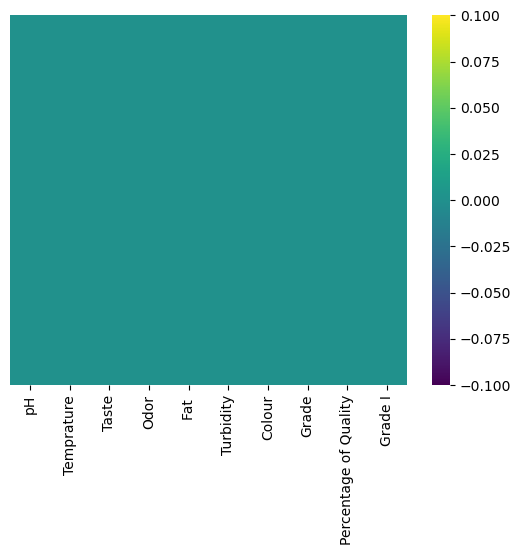

In [17]:
# to illustrate null values using heatmap
sns.heatmap(data.isnull(), yticklabels=False,cmap='viridis')

# Statistical Data

In [18]:
#calculate stastical data
data.mean()
data.median()
data.mode()
data.std()
data.sem()
data.var()
data.quantile()

C:\Users\Diksha\AppData\Local\Temp\ipykernel_12392\1134502452.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()
C:\Users\Diksha\AppData\Local\Temp\ipykernel_12392\1134502452.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()
C:\Users\Diksha\AppData\Local\Temp\ipykernel_12392\1134502452.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns

pH                         6.7
Temprature                45.0
Taste                      1.0
Odor                       0.0
Fat                        1.0
Turbidity                  0.0
Colour                   250.0
Percentage of Quality      0.5
Name: 0.5, dtype: float64

In [19]:
data['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [20]:
data.dtypes

pH                       float64
Temprature               float64
Taste                      int64
Odor                       int64
Fat                        int64
Turbidity                  int64
Colour                   float64
Grade                     object
Percentage of Quality    float64
Grade I                   object
dtype: object

In [21]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade', 'Percentage of Quality', 'Grade I'],
      dtype='object')

# Data Visualization

C:\Users\Diksha\AppData\Local\Temp\ipykernel_12392\945256289.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

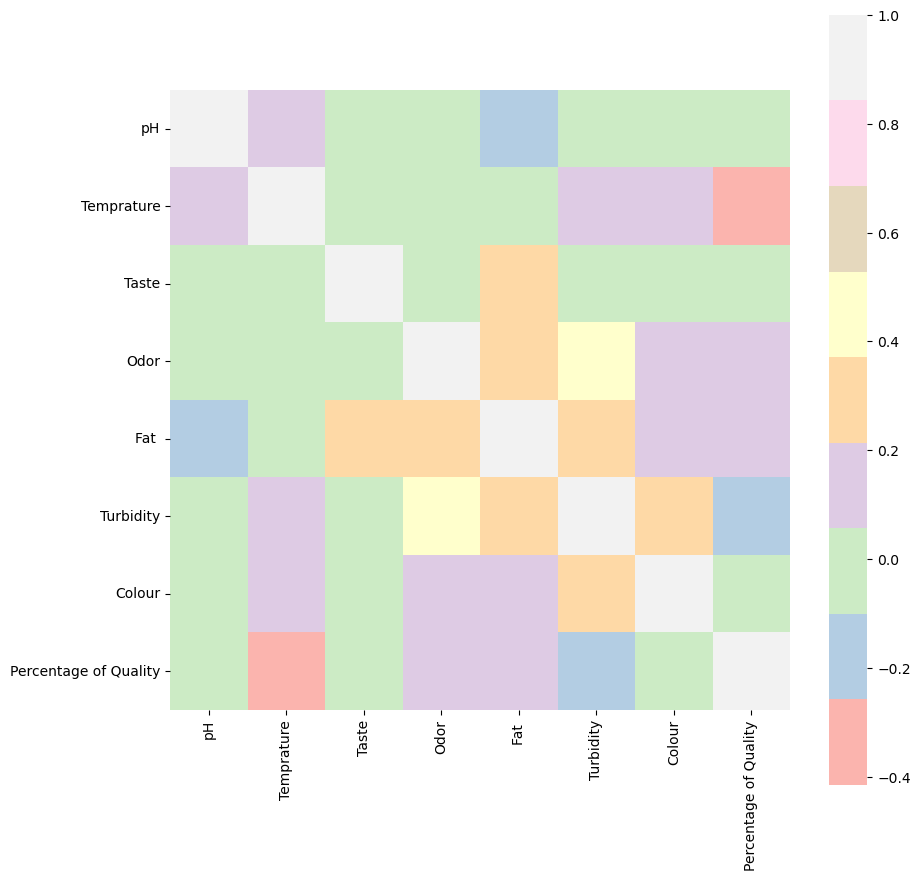

In [22]:
#Examaning a correlation matrix of all the features 
corrmat = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,cmap="Pastel1", square=True)

Conclusion: This is heatmap. It represents how each and every column is correlated ranging from -0.4 to 1.0.

C:\Users\Diksha\AppData\Local\Temp\ipykernel_12392\1613084152.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='GnBu', annot=True)


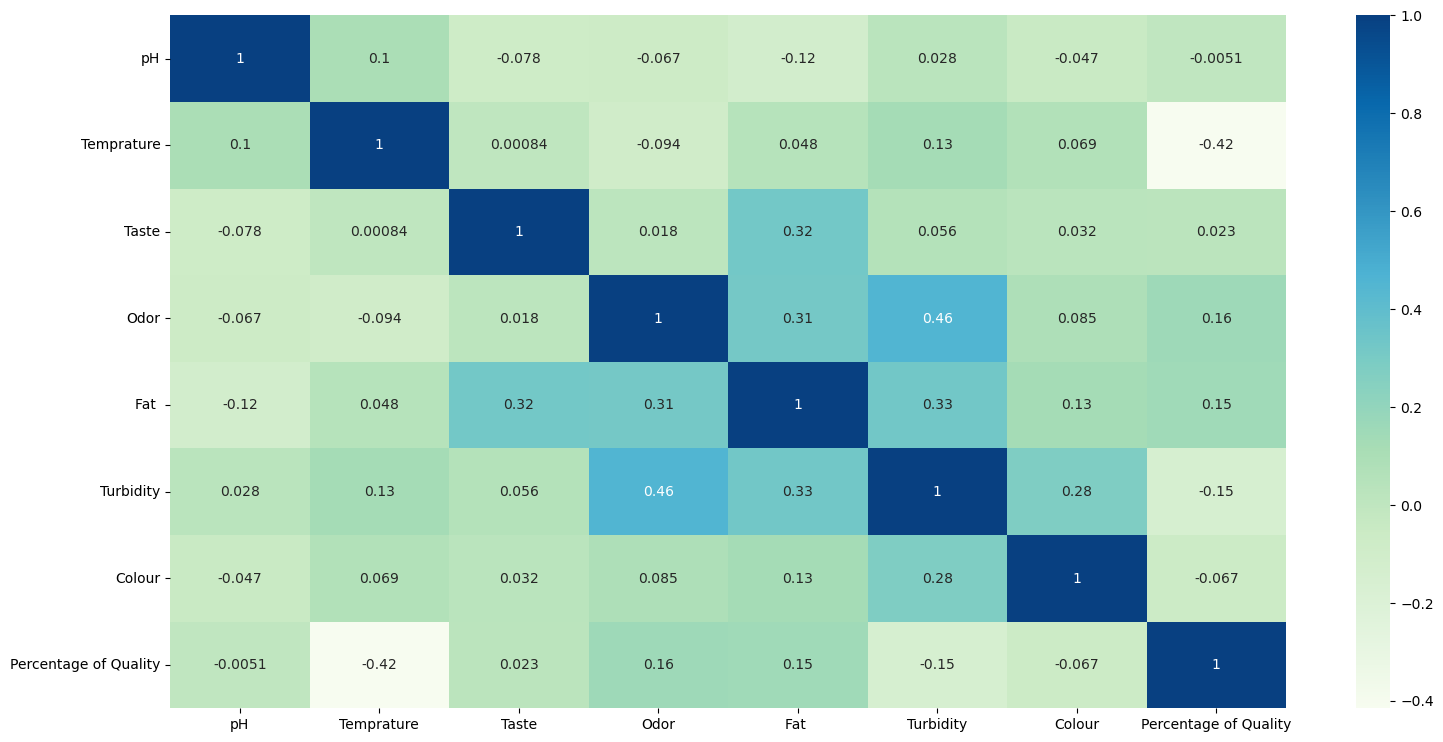

In [23]:
plt.figure(figsize = (18,9))
sns.heatmap(data.corr(), cmap='GnBu', annot=True)
plt.show()

Conclusion: It represents how each and every column is correlated with values.

<Axes: xlabel='Grade', ylabel='Count'>

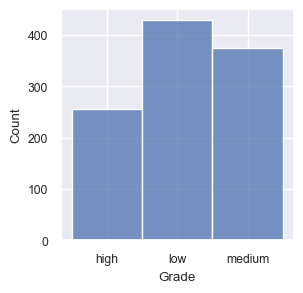

In [24]:
# histplot (categorical) 
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=data, x='Grade')

Conclusion:This is histogram. Tt represents count of three types( high, medium and low) of feature 'grade'. starting with highest number with low quality of milk. then medium quality and with lowest number of high quality of milk.

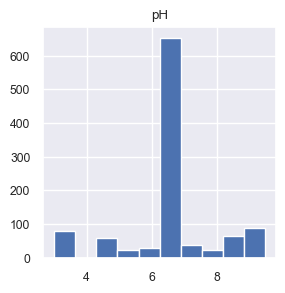

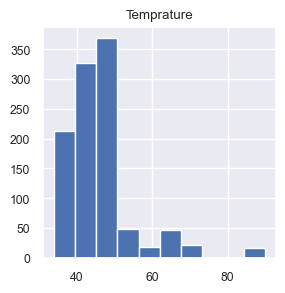

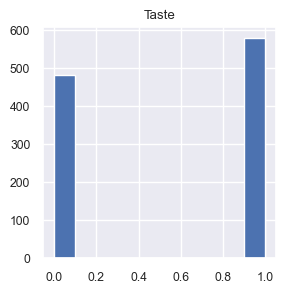

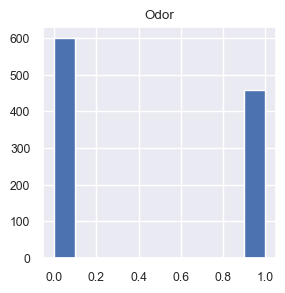

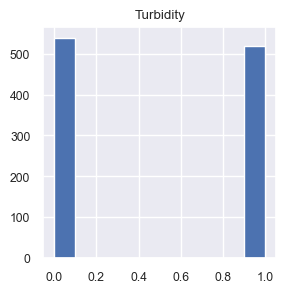

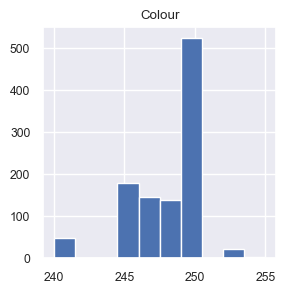

In [25]:
column=['pH','Temprature','Taste','Odor','Turbidity','Colour']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

Conclusion: This is histogram for various features together. they are as follows: 'pH','Temprature','Taste','Odor','Turbidity','Colour' 
1.pH:It varies from 0.0 to 10.0 with maximum at 6.6 
2.Temperature:It varies from 30 to 100 with maximum ranging between 40 to 60.
3.Taste:It varies from 0.0 to 1.0 with values at 0 and 1 as it comprises of only two values.
4.Odor:It varies from 0.0 to 1.0 with values at 0 and 1 as it comprises of only two values.
5.Turbidity: It varies from 0.0 to 1.0 with values at 0 and 1 as it comprises of only two values.
6.Colour:It varies from 240 to 255 with maximum on 250.

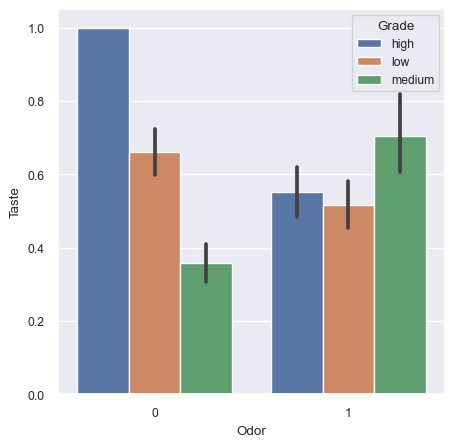

In [26]:
plt.figure(figsize=(5,5))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=data)
plt.show()

Conclusion: this is barplot.it is plotted between odor and taste with respect to grade. For value 0 of odor, it gives value for high, medium and low, being maximum for high and least for medium. For value 1 of odor, it gives value for high, medium and low, being maximum for medium and least for low.  

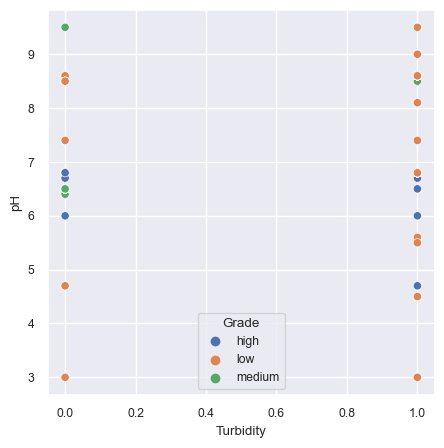

In [27]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=data)
plt.show()

conclusion: this is scatterplot.it represents Turbidity and pH with respect to grade. It varies between 0.0 to 1.0, plots also can be seen on 0 and 1 only with grade from low to high.

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.5% of the p

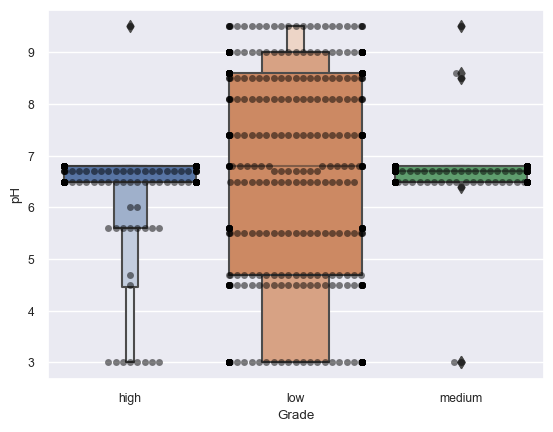

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.7% of the p

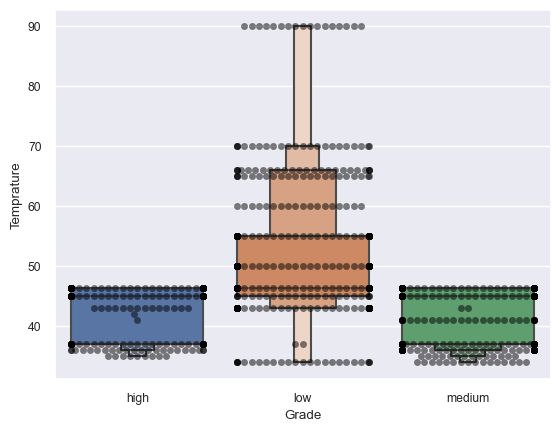

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.1% of the p

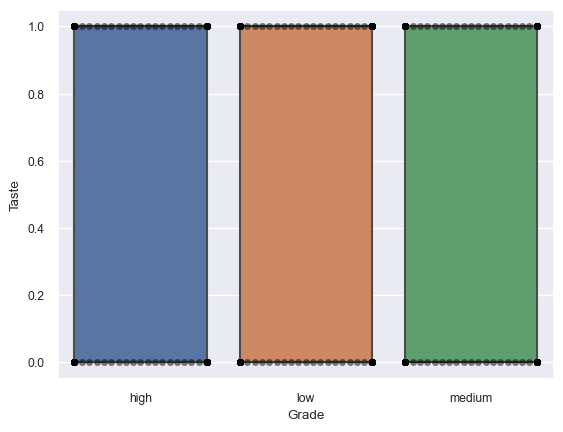

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.1% of the p

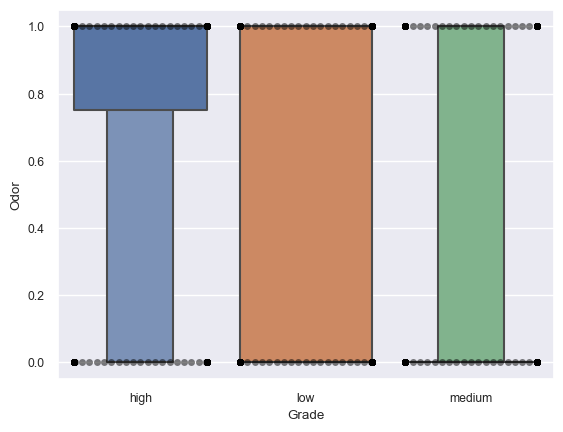

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 89.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.1% of the p

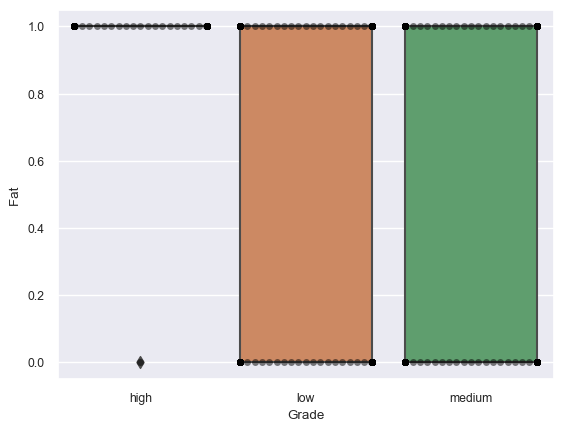

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.1% of the p

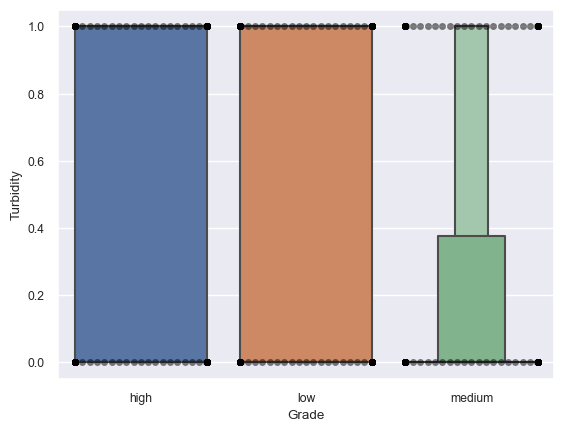

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.6% of the p

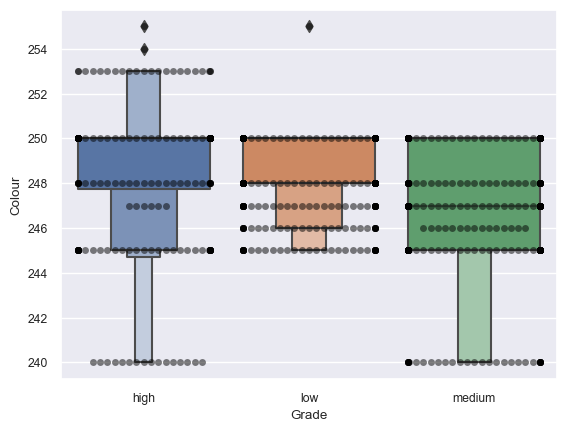

In [28]:
features = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
for i in features:
    sns.swarmplot(x=data["Grade"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Grade"], y=data[i])
    plt.show()

Conclusion:This is boxplot. It is plot for the followinf features:
'pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'
This is to show outliers in the following features
1.pH:No outliers were detected
2.Temperature: 17 outliers were detected.
3.Taste:No outliers were detected
4.Odor:No outliers were detected
5.Fat:No outliers were detected
6.Turbidity:No outliers were detected
7.Colour:No outliers were detected

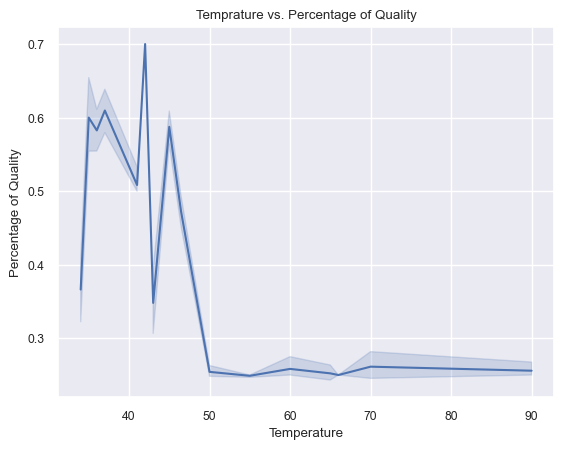

In [29]:
# Weight vs TSH(mIU/L) 
sns.lineplot(x='Temprature', y='Percentage of Quality', data=data)
plt.title('Temprature vs. Percentage of Quality')
plt.xlabel('Temperature')
plt.ylabel('Percentage of Quality')
plt.show()

Conclusion: This is line plot.It is plotted between percentage of quality and Temperature.The temperature varies from 30 to 90 and percentage of Quality varies from 0.2 to 0.95. There are lot of variation in the graph from 30 to 50 and then there is saturation in the percentage of quality from 50 to 90.

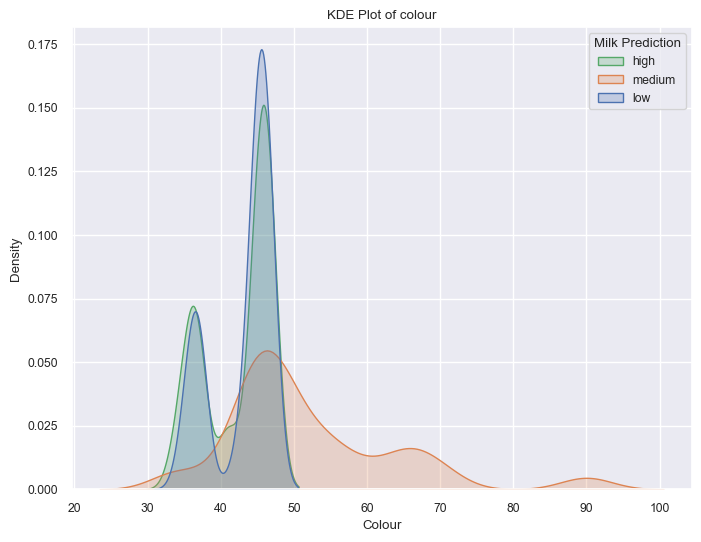

In [30]:
# Create a KDE plot
plt.figure(figsize=(8, 6)) 
sns.kdeplot(data=data, x='Temprature', hue='Grade', fill=True, common_norm=False)
plt.title('KDE Plot of colour')
plt.xlabel('Colour')
plt.ylabel('Density')
plt.legend(title='Milk Prediction', loc='upper right',labels=['high','medium','low'])
plt.show()

Conclusion:This is KDE plot, plotted for COlour with respect to Grade.It is high for low, then moderate for medium and low for high.

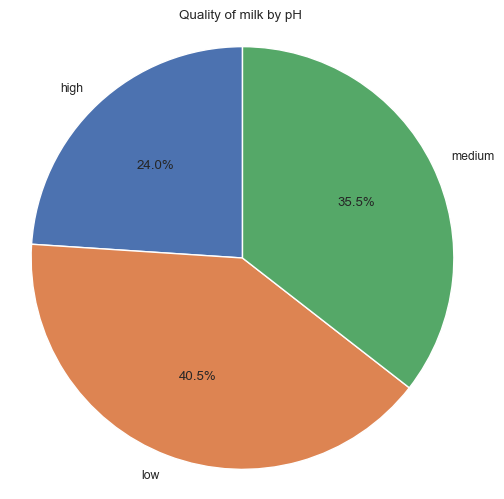

In [31]:
# PCOS status wrt age
temperature_grouped = data.groupby('Grade')['pH'].sum()
plt.figure(figsize=(6, 6))  # Set the figure size (optional)
plt.pie(temperature_grouped, labels=temperature_grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Quality of milk by pH ')
plt.axis('equal')  
plt.show()

Conclusion:This is pieplot. It is plotted for grade of milk quality with respect to temperature. so it is as follows:
low:40.5%
medium:35.5%
high:24.0%

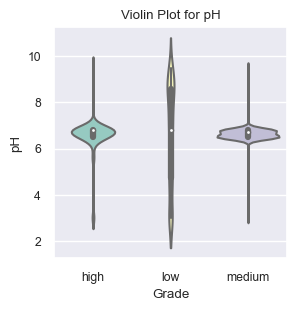

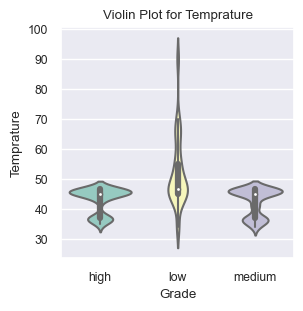

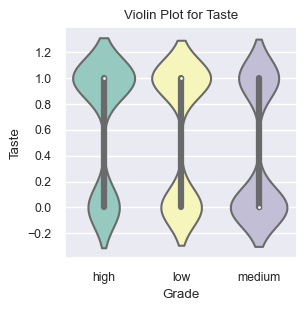

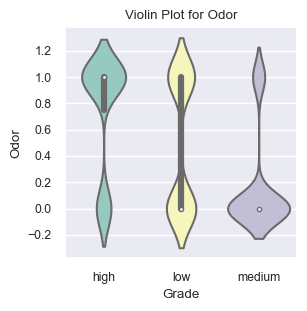

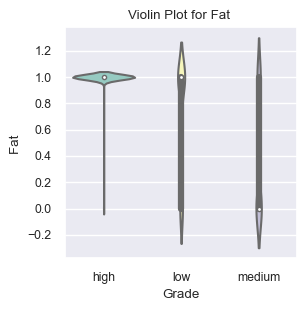

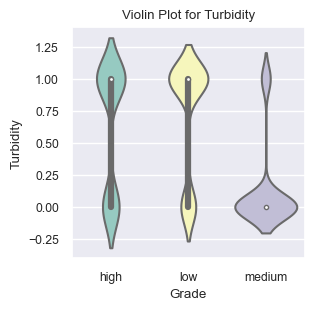

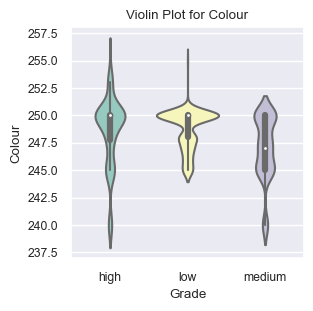

In [32]:


# List of columns to create violin plots for
columns_to_plot = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']

# Create a loop to generate violin plots
for column in columns_to_plot:
    plt.figure(figsize=(3, 3))  # Set the figure size
    sns.violinplot(x='Grade', y=column, data=data, palette='Set3')
    plt.title(f'Violin Plot for {column}')
    plt.xlabel('Grade')
    plt.ylabel(column)
    plt.show()


Conclusion:This is violin plot. It is plot for the followinf features: 'pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour' This is to show outliers in the following features 1.pH:No outliers were detected 2.Temperature: 17 outliers were detected. 3.Taste:No outliers were detected 4.Odor:No outliers were detected 5.Fat:No outliers were detected 6.Turbidity:No outliers were detected 7.Colour:No outliers were detected

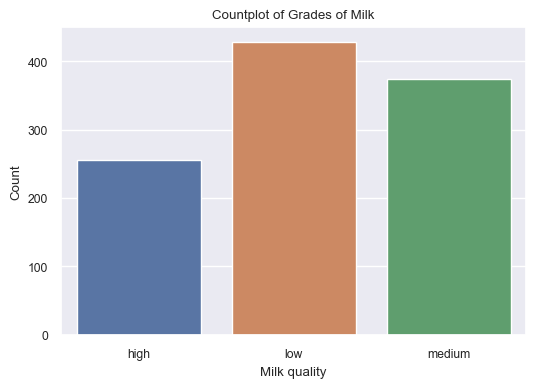

In [33]:
# Create a countplot
plt.figure(figsize=(6, 4))  
sns.countplot(data=data, x='Grade')
plt.title('Countplot of Grades of Milk')
plt.xlabel('Milk quality')
plt.ylabel('Count')
plt.show()

Conclusion:This is Countplot. It gives count of three grades of quality i.e. low, medium and high. 
low       429
medium    374
high      256


C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has

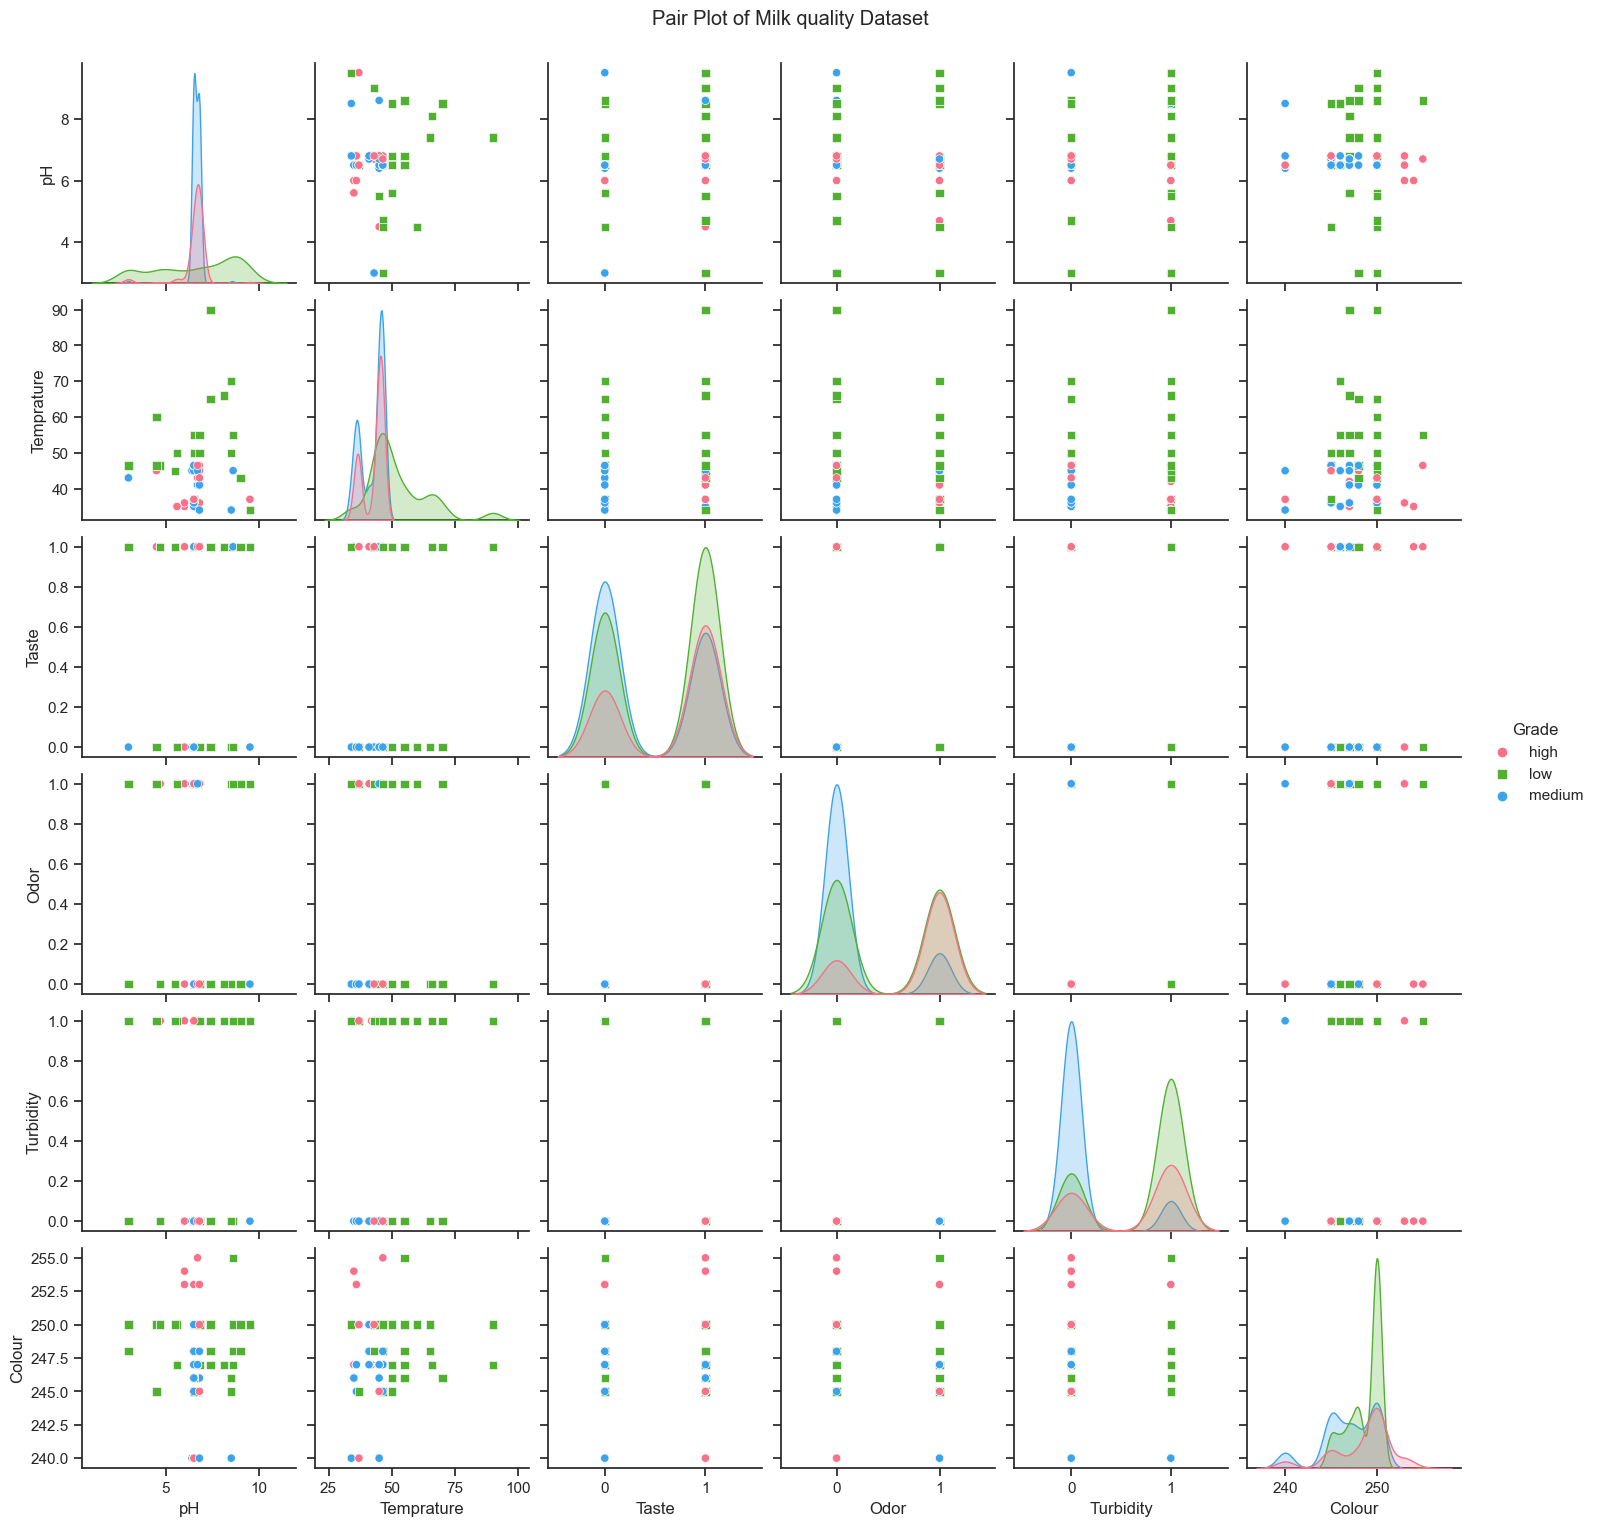

In [34]:
# relevant columns for the pair plot
selected_columns = ['pH','Temprature','Taste','Odor','Turbidity','Colour','Grade']
sns.set(style='ticks') 
sns.pairplot(data[selected_columns], hue='Grade', palette='husl', markers=["o", "s"])
plt.suptitle('Pair Plot of Milk quality Dataset', y=1.02)
plt.show()

Conclusion:This is pairlot for various features:'pH','Temprature','Taste','Odor','Turbidity','Colour','Grade'

# Detection of Outliers

In [35]:
from scipy import stats
z_scores = stats.zscore(data['pH'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = data[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno1 = data[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade, Percentage of Quality, Grade I]
Index: []


In [36]:
from scipy import stats
z_scores = stats.zscore(dno1['Temprature'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno1[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno2 = dno1[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
      pH  Temprature  Taste  Odor  Fat   Turbidity  Colour Grade  \
13   7.4        90.0      1     0     1          1   250.0   low   
58   7.4        90.0      1     0     1          1   250.0   low   
106  7.4        90.0      1     0     1          1   250.0   low   
162  7.4        90.0      1     0     1          1   247.0   low   
190  7.4        90.0      1     0     1          1   250.0   low   
213  7.4        90.0      1     0     1          1   250.0   low   
290  7.4        90.0      1     0     1          1   247.0   low   
318  7.4        90.0      1     0     1          1   250.0   low   
341  7.4        90.0      1     0     1          1   250.0   low   
426  7.4        90.0      1     0     1          1   250.0   low   
469  7.4        90.0      1     0     1          1   250.0   low   
525  7.4        90.0      1     0     1          1   247.0   low   
604  7.4        90.0      1     0     1          1   247.0   low   
675  7.4        90

In [37]:
from scipy import stats
z_scores = stats.zscore(dno2['Taste'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno2[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno3 = dno2[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade, Percentage of Quality, Grade I]
Index: []


In [38]:
from scipy import stats
z_scores = stats.zscore(dno3['Odor'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno3[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno4 = dno3[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade, Percentage of Quality, Grade I]
Index: []


In [39]:
from scipy import stats
z_scores = stats.zscore(dno4['Turbidity'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno4[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno5 = dno4[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade, Percentage of Quality, Grade I]
Index: []


In [40]:
from scipy import stats
z_scores = stats.zscore(dno5['Colour'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno5[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
data_no_outlier = dno5[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade, Percentage of Quality, Grade I]
Index: []


In [41]:
data_no_outlier

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Percentage of Quality,Grade I
0,6.0,35.000000,1,0,1,0,254.0,high,0.80,High
1,6.0,36.000000,0,1,0,1,253.0,high,0.65,High
2,8.5,70.000000,1,1,1,1,246.0,low,0.25,Low
3,9.5,34.000000,1,1,0,1,250.0,low,0.30,Low
4,9.5,37.000000,0,0,0,0,250.0,medium,0.50,Low
...,...,...,...,...,...,...,...,...,...,...
1054,6.7,45.000000,1,1,0,0,247.0,medium,0.50,Low
1055,6.7,46.462567,1,0,1,0,255.0,high,0.80,High
1056,3.0,46.462567,1,1,1,1,250.0,low,0.25,Low
1057,6.8,43.000000,1,0,1,0,250.0,high,0.85,High


# Linear Regression

In [42]:
# Import libraries for building and training model
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 

In [43]:
# formation of data for X

numerical_cols = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
SS = StandardScaler ()
SS_cols = pd.DataFrame(SS.fit_transform(data_no_outlier[numerical_cols]), columns=SS.get_feature_names_out(numerical_cols))

In [44]:
# independent variable X and dependent variable Y
X = SS_cols
Y =  data_no_outlier['Percentage of Quality']

In [45]:
X

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,-0.397670,-1.392746,0.924171,-0.885577,0.708125,-0.966028,2.190625
1,-0.397670,-1.263215,-1.082051,1.129207,-1.412180,1.035167,1.822458
2,1.307564,3.140821,0.924171,1.129207,0.708125,1.035167,-0.754705
3,1.989657,-1.522276,0.924171,1.129207,-1.412180,1.035167,0.717960
4,1.989657,-1.133685,-1.082051,-0.885577,-1.412180,-0.966028,0.717960
...,...,...,...,...,...,...,...
1037,0.079796,-0.097441,0.924171,1.129207,-1.412180,-0.966028,-0.386539
1038,0.079796,0.092006,0.924171,-0.885577,0.708125,-0.966028,2.558791
1039,-2.443950,0.092006,0.924171,1.129207,0.708125,1.035167,0.717960
1040,0.148005,-0.356502,0.924171,-0.885577,0.708125,-0.966028,0.717960


In [46]:
Y

0       0.80
1       0.65
2       0.25
3       0.30
4       0.50
        ... 
1054    0.50
1055    0.80
1056    0.25
1057    0.85
1058    0.25
Name: Percentage of Quality, Length: 1042, dtype: float64

In [47]:
#train the model; test size = 0.2 i.e. train size = 0.8 ; random state =0
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [48]:
#build the model
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [49]:
#intercept Bo
model.intercept_

0.4626692732037761

In [50]:
#coefficient B1
print(model.coef_)

[ 0.00982027 -0.07754376 -0.01234399  0.03885192  0.04196381 -0.0481166
 -0.0036306 ]


In [51]:
#Evaluation Metrics
mae = mean_absolute_error(Y_test,y_pred)
mse= mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
#adj_r2 = 1-(1-r2)*(n-1)/(n-p-1) where n - no. of samples= 1042 p - no. of parameters(variables) = 8
adj_r2 = 1-(1-r2)*(1042-1)/(1042-8-1)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R Squared',r2)
print('Adjusted R Squared',adj_r2)


Mean Absolute Error 0.13409446547141302
Mean Squared Error 0.02628374275589175
Root Mean Absolute Error 0.1621226164231621
R Squared 0.34400648661552435
Adjusted R Squared 0.33892618835117216


In [52]:
# calculate SSR, SST, SSE
y_mean = np.mean(Y_test)
ssr = np.sum((y_pred - y_mean)**2)
print( 'SSR:',ssr)
sst = np.sum((Y_test - y_mean)**2)
print('SST:',sst)
sse = sst - ssr
print('SSE:',sse)

SSR: 2.424709385010404
SST: 8.37401913875598
SSE: 5.949309753745576


# Tuning

In [53]:
#import libraries for tuning
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [54]:
# tuning with linear regression
lr_model =LinearRegression()
lr_score = cross_val_score(lr_model,X_train,Y_train,cv=5)
lr_model.fit(X_train,Y_train)
lr_prediction =lr_model.predict(X_test)
lr_mae =mean_absolute_error(Y_test,lr_prediction)
lr_mse =mean_squared_error(Y_test,lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(Y_test,lr_prediction)
print('Linear mae',lr_mae)
print('Linear mse',lr_mse)
print('Linear rmse',lr_rmse)
print('Linear r2',lr_r2)

Linear mae 0.13409446547141302
Linear mse 0.02628374275589175
Linear rmse 0.1621226164231621
Linear r2 0.34400648661552435


In [55]:
#tuning with L1 regularization Lasso
lasso_model = Lasso(alpha=1.0)
lasso_score = cross_val_score(lasso_model,X_train,Y_train,cv=5)
lasso_model.fit(X_train,Y_train)
lasso_prediction =lasso_model.predict(X_test)
lasso_mae =mean_absolute_error(Y_test,lasso_prediction)
lasso_mse =mean_squared_error(Y_test,lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(Y_test,lr_prediction)
print('Lasso mae',lasso_mae)
print('Lasso mse',lasso_mse)
print('Lasso rmse',lasso_rmse)
print('Lasso r2',lasso_r2)

Lasso mae 0.1717622934341201
Lasso mse 0.04009746426012003
Lasso rmse 0.2002435124045721
Lasso r2 0.34400648661552435


In [56]:
#tuning with L2 regularization Ridge
ridge_model = Ridge(alpha=1.0)
ridge_score = cross_val_score(ridge_model,X_train,Y_train,cv=5)
ridge_model.fit(X_train,Y_train)
ridge_prediction =ridge_model.predict(X_test)
ridge_mae =mean_absolute_error(Y_test,ridge_prediction)
ridge_mse =mean_squared_error(Y_test,ridge_prediction)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_test,ridge_prediction)
print('ridge mae',ridge_mae)
print('ridge mse',ridge_mse)
print('ridge rmse',ridge_rmse)
print('ridge r2',ridge_r2)

ridge mae 0.13408828418546773
ridge mse 0.026287862465406042
ridge rmse 0.1621353214614448
ridge r2 0.3439036663001872


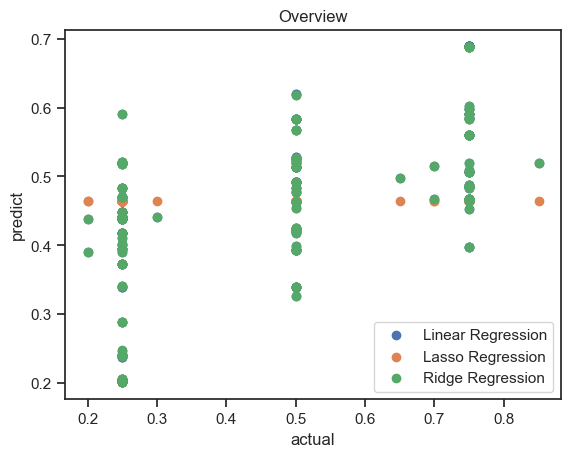

In [57]:
#graph for Overview
plt.scatter(Y_test,lr_prediction,alpha=1.0,label='Linear Regression')
plt.scatter(Y_test,lasso_prediction,alpha=1.0,label='Lasso Regression')
plt.scatter(Y_test,ridge_prediction,alpha=1.0,label='Ridge Regression')
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('Overview')
plt.legend(loc='lower right')
plt.show()

In [58]:
# MM estimator:huberregression
from sklearn.linear_model import HuberRegressor
X_scaled = SS.fit_transform(X_test)
huber = HuberRegressor(epsilon=1.35)
huber.fit(X_scaled, Y_test)
huber_prediction = huber.predict(X_scaled)
huber_mae =mean_absolute_error(Y_test,huber_prediction)
huber_mse =mean_squared_error(Y_test,huber_prediction)
huber_rmse = np.sqrt(huber_mse)
huber_r2 = r2_score(Y_test,huber_prediction)
print('huber mae:',huber_mae)
print('huber mse:',huber_mse)
print('huber rmse:',huber_rmse)
print('huber r2:',huber_r2)

huber mae: 0.11874594933634888
huber mse: 0.027355777229837418
huber rmse: 0.1653958198680892
huber r2: 0.31725049270840644


In [59]:
#LMS estimate
theta = np.random.randn(7, 100)
learning_rate = 0.01
n_iterations = 1000
for iteration in range(n_iterations):
    y_pred = X_test.dot(theta)
    errors = y_pred - Y_test
    
    # Compute the gradient of the mean squared error with respect to theta
    gradient = 2 * X_test.T.dot(errors) / len(X_test)
    
    # Update theta using the gradient and learning rate
    theta = -learning_rate * gradient

# The final theta values are the LMS estimates
lms_estimate_intercept = theta[0][0]
lms_estimate_coefficient = theta[1][0]

print("LMS Estimate Intercept:", lms_estimate_intercept)
print("LMS Estimate Coefficient:", lms_estimate_coefficient)

LMS Estimate Intercept: nan
LMS Estimate Coefficient: -0.0012395200997134346


In [60]:
# lts estimate
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

ransac.fit(X_test, Y_test)

lts_estimate_coeff = ransac.estimator_.coef_
lts_estimate_intercept = ransac.estimator_.intercept_

print("LTS Estimate Coefficients:", lts_estimate_coeff)
print("LTS Estimate Intercept:", lts_estimate_intercept)

lts_prediction = ransac.predict(X_test)
lts_mae =mean_absolute_error(Y_test,lts_prediction)
lts_mse =mean_squared_error(Y_test,lts_prediction)
lts_rmse = np.sqrt(lts_mse)
lts_r2 = r2_score(Y_test,huber_prediction)
print('lts mae:',lts_mae)
print('lts mse:',lts_mse)
print('lts rmse:',lts_rmse)
print('lts r2:',lts_r2)

LTS Estimate Coefficients: [ 0.16430927 -0.1129736   0.02557571  0.06624337  0.02521073 -0.0036688
  0.03710449]
LTS Estimate Intercept: 0.5355876495568884
lts mae: 0.1350788043530582
lts mse: 0.049547348175360356
lts rmse: 0.2225923362907186
lts r2: 0.31725049270840644


In [61]:
#theil-sen regressor
from sklearn.linear_model import TheilSenRegressor
theil_sen = TheilSenRegressor()
theil_sen.fit(X_test, Y_test)
theil_sen_estimate_intercept = theil_sen.intercept_
theil_sen_estimate_coefficient = theil_sen.coef_[0]
print("Theil-Sen Estimate Intercept:", theil_sen_estimate_intercept)
print("Theil-Sen Estimate Coefficient:", theil_sen_estimate_coefficient)

ts_prediction = theil_sen.predict(X_test)
ts_mae =mean_absolute_error(Y_test,ts_prediction)
ts_mse =mean_squared_error(Y_test,ts_prediction)
ts_rmse = np.sqrt(ts_mse)
ts_r2 = r2_score(Y_test,ts_prediction)
print('ts mae:',ts_mae)
print('ts mse:',ts_mse)
print('ts rmse:',ts_rmse)
print('ts r2:',ts_r2)

Theil-Sen Estimate Intercept: 0.46751163224967673
Theil-Sen Estimate Coefficient: 0.06428669377479448
ts mae: 0.12520239261820504
ts mse: 0.027325114463441755
ts rmse: 0.16530309877144395
ts r2: 0.318015778537171


Conclusion for Linear Regression model R2 is 0.34 for the model which is very less.Even after tuning of the model using cross validation there is no visible difference, it remains same.therefore it is not good fit model.

# Logistics Regression

In [62]:
# independent variable X and dependent variable Y
X = SS_cols
y= data_no_outlier["Grade I"].replace({"Low": 0, "High": 1}).to_frame(name="Grade I")

In [63]:
y

,Grade I
0,1
1,1
2,0
3,0
4,0
...,...
1054,0
1055,1
1056,0
1057,1


In [64]:
#Importing Libraries
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#train the model
X_train,X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [66]:

log = LogisticRegression()

In [67]:
#build the model
log.fit(X_train, Y_train)

C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [68]:
#train Score
Train_score = log.score(X_train,Y_train)
print('Train_score: ',Train_score)

Train_score:  0.8739495798319328


In [69]:
#test Score
Test_score = log.score(X_test, Y_test)
print('Test_Score: ',Test_score)

Test_Score:  0.8708133971291866


In [70]:
#predicted Score for train and test
pred_train = log.predict(X_train)
pred_test = log.predict(X_test)


In [71]:
accuracy_logistics = accuracy_score(Y_test,pred_test)

In [72]:
#Classification report
print(metrics.classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       153
           1       0.78      0.71      0.75        56

    accuracy                           0.87       209
   macro avg       0.84      0.82      0.83       209
weighted avg       0.87      0.87      0.87       209



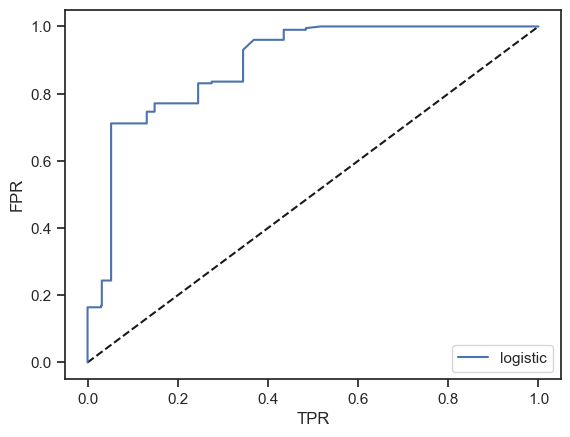

In [73]:
#ROC curve
roc = log.predict_proba(X_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(Y_train, roc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.ylabel('FPR')
plt.xlabel('TPR')
plt.legend(loc='lower right')
plt.show()

In [74]:
metrics.roc_auc_score(Y_train, roc)

0.8876385477674917

Confusion Matrix:  [[142  11]
 [ 16  40]]


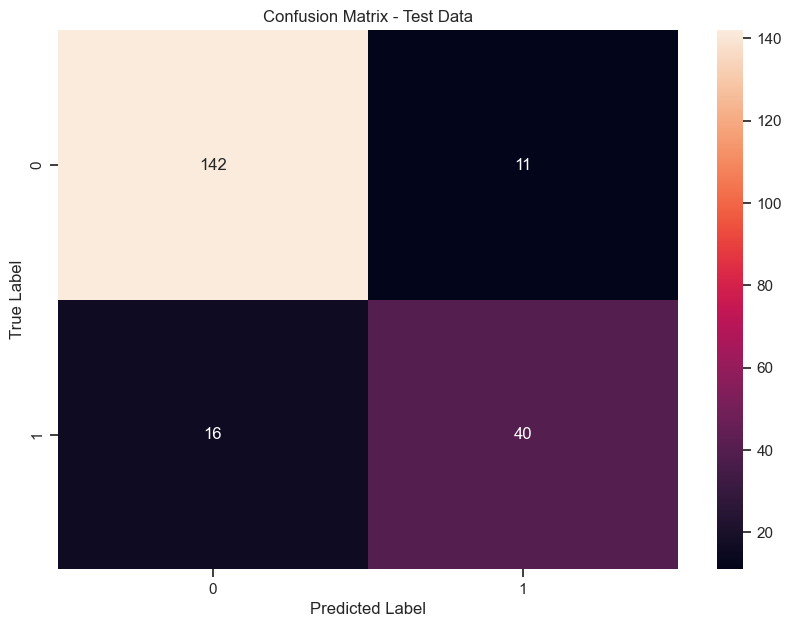

In [75]:
# COnfusion Matrix
cm = confusion_matrix(Y_test,pred_test)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = '.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Tuning

# GridSearchCV

In [76]:
param_grid = {
    'penalty':['l1', 'l2'],
    'C' : [0.1, 0.5, 1, 5, 10]
}

In [77]:
grid = GridSearchCV(estimator = log, param_grid=param_grid, cv = 5)

In [78]:
grid.fit(X_train, Y_train)

C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [79]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [80]:
print('Best hyperparameters: ',best_param)

Best hyperparameters:  {'C': 1, 'penalty': 'l2'}


In [81]:
#predicting y
y_pred = best_model.predict(X_test)

In [82]:
#classification report
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       153
           1       0.78      0.71      0.75        56

    accuracy                           0.87       209
   macro avg       0.84      0.82      0.83       209
weighted avg       0.87      0.87      0.87       209



Confusion Matrix:  [[142  11]
 [ 16  40]]


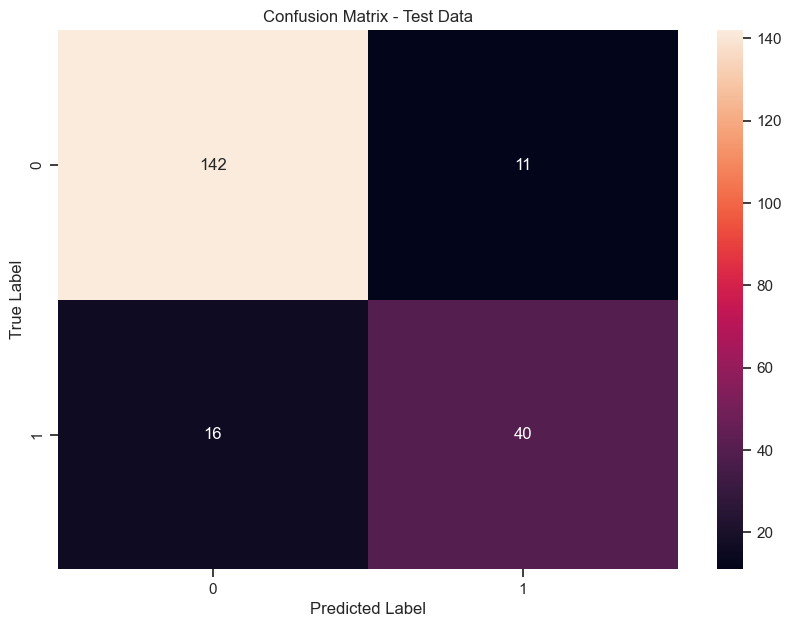

In [83]:
#confusion matrix
cm = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = '.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [84]:
logistic_random_param={'C':loguniform(1e-4,1e0),
                      'max_iter':(np.arange(100,800,10))}
grid=RandomizedSearchCV(estimator=log, param_distributions=logistic_random_param, cv=5)

In [85]:
grid.fit(X_train,Y_train)

C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000205D23D1490>,
                                        'max_iter': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
       360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
       490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610,
       620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740,
       750, 760, 770, 780, 790])})

In [86]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [87]:
print("Best Hyperparameters:", best_param)

Best Hyperparameters: {'C': 0.6537779461371104, 'max_iter': 760}


In [88]:
#predict y
y_pred = best_model.predict(X_test)

In [89]:
#classification report
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       153
           1       0.78      0.71      0.75        56

    accuracy                           0.87       209
   macro avg       0.84      0.82      0.83       209
weighted avg       0.87      0.87      0.87       209



Confusion Matrix:  [[142  11]
 [ 16  40]]


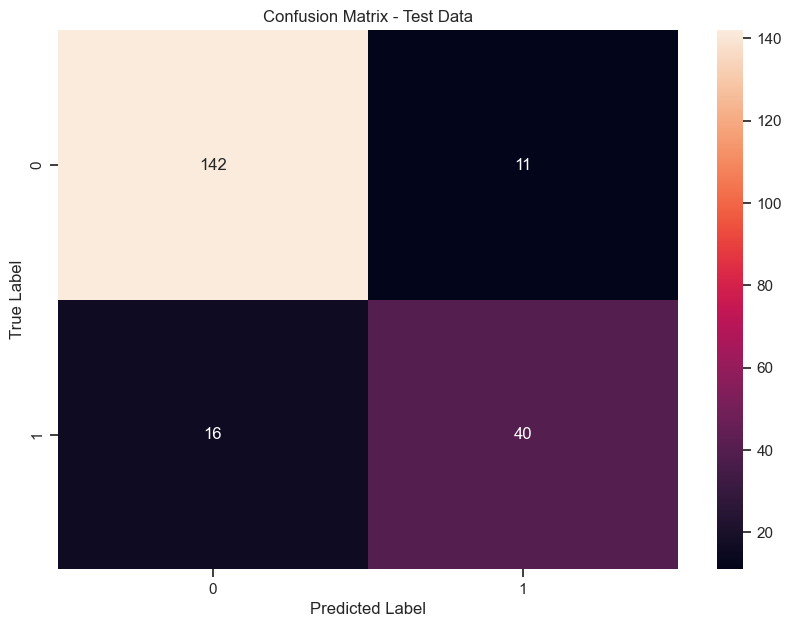

In [90]:
#confusion matrix
cm = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = '.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Conclusion for Logistics Model: The initial logistic regression model had good overall performance with an accuracy of 0.87. It showed a balance between precision and recall, resulting in a high F1-score of 0.87. After tuning with GridSearchCV, the model maintained a high accuracy of 0.87, with a slight improvement in precision (0.84) while keeping the recall and F1-Score fairly consistent. However, the RandomizedSearchCV tuning resulted in a slightly lower accuracy (0.85) compared to the GridSearchCV-tuned model. It showed a decrease in both recall and precision, resulting in a lower F1-Score (0.79). Overall, the logistic regression model appears to be a reasonably good choice for milk quality prediction, especially after the GridSearchCV tuning, which achieved high accuracy and precision. The choice between GridSearchCV and RandomizedSearchCV may depend on the trade-off between model performance and computational resources, as RandomizedSearchCV explores a subset of hyperparameter combinations more efficiently but may not always find the optimal configuration. Overall, this is good fit model.

# SVM

In [91]:
#mapping targeted column classes as 0,1&2
data_no_outlier["Grade"] = data_no_outlier["Grade"].replace({"low": 0,"medium":1,"high": 2}).to_frame(name="Grade")


In [92]:
# independent variable X and dependent variable Y
X = SS_cols
Y_ = data_no_outlier["Grade"]

In [93]:
Y_

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1042, dtype: int64

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve,auc

In [95]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y_,test_size=0.2,random_state=0)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [97]:
svcm= SVC(kernel='linear')

In [98]:
#build the model
svcm.fit(X_train,Y_train)

SVC(kernel='linear')

In [99]:
#predicting y
y_pred = svcm.predict(X_test)

In [182]:
# accuracy
accuracy_SVM=accuracy_score(Y_test,y_pred)
print('Accuracy:',accuracy_SVM)

Accuracy: 0.9282296650717703


In [103]:
#classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.94      0.64        81
           1       0.12      0.08      0.10        72
           2       0.00      0.00      0.00        56

    accuracy                           0.39       209
   macro avg       0.20      0.34      0.24       209
weighted avg       0.23      0.39      0.28       209



C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:  [[76  5  0]
 [66  6  0]
 [16 40  0]]


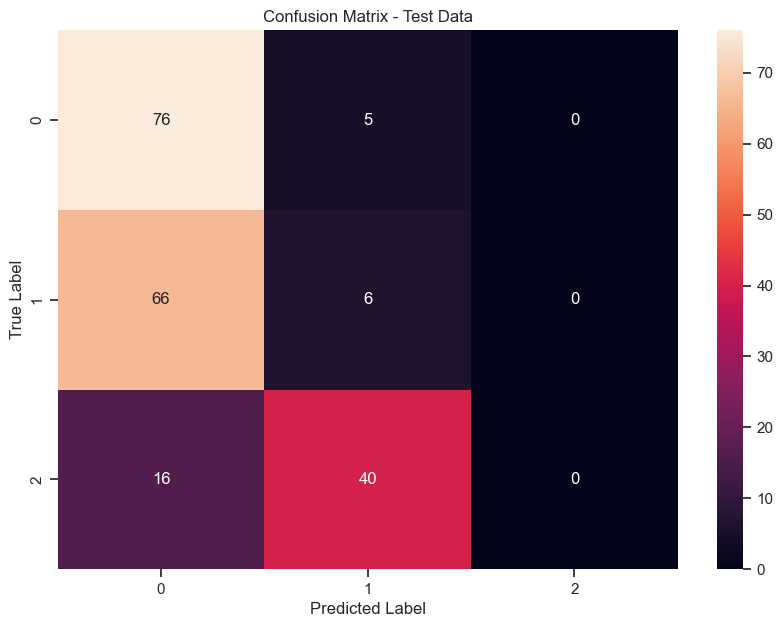

In [104]:
#confusion matrix
cm = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

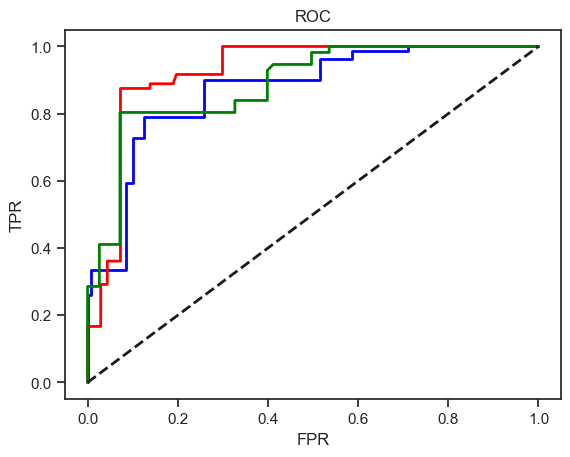

In [105]:
#roc curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

yb= label_binarize(Y_, classes=[0,1,2])
nc= yb.shape[1]
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=0))
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)
fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(nc):
    fpr[i], tpr[i], _ = roc_curve(Y_test ==i, y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
color = ['blue','red','green']
for i, color in zip(range(nc),color):
    plt.plot (fpr[i], tpr[i], color=color, lw=2,
             label='ROC(area= {: .2f}) for class{}'.format(roc_auc[i],data_no_outlier['Grade'][i]))
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# Tuning 

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# GridSearchCV

In [107]:
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf','poly','sigmoid'],  # Kernel type
      
}

In [108]:
grid = GridSearchCV(estimator = svcm, param_grid=param_grid, cv = 5)

In [109]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [110]:
best_parameter = grid.best_params_
best_model = grid.best_estimator_
print('hyperparameters: ',best_parameter)

hyperparameters:  {'C': 10, 'kernel': 'rbf'}


In [111]:
#predicting y
y_pred = best_model.predict(X_test)

In [112]:
#accuracy
acc=accuracy_score(Y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9521531100478469


In [113]:
#classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       1.00      0.88      0.93        72
           2       0.86      1.00      0.93        56

    accuracy                           0.95       209
   macro avg       0.95      0.95      0.95       209
weighted avg       0.96      0.95      0.95       209



Confusion Matrix:  [[80  0  1]
 [ 1 63  8]
 [ 0  0 56]]


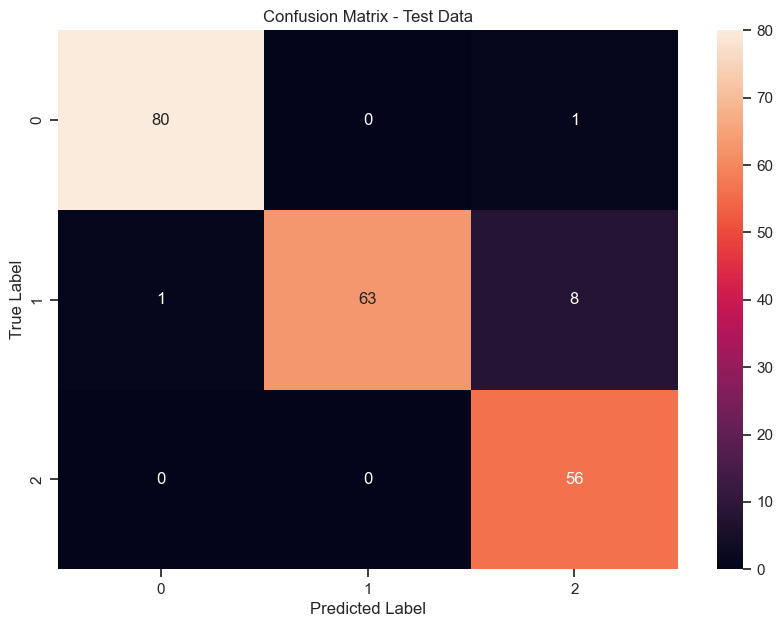

In [114]:
#confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RandomizedSearchCV

In [115]:
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf','poly','sigmoid'],  # Kernel type
      
}
random=RandomizedSearchCV(svcm, param_grid, cv=5)

In [116]:
random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'),
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [117]:
best_parameters = random.best_params_
best_model = random.best_estimator_
print('Hyperparameters:',best_parameters)

Hyperparameters: {'kernel': 'rbf', 'C': 10}


In [118]:
#predict of y
y_pred = best_model.predict(X_test)

In [119]:
#accuracy
acc=accuracy_score(Y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9521531100478469


In [120]:
#classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       1.00      0.88      0.93        72
           2       0.86      1.00      0.93        56

    accuracy                           0.95       209
   macro avg       0.95      0.95      0.95       209
weighted avg       0.96      0.95      0.95       209



Confusion Matrix:  [[80  0  1]
 [ 1 63  8]
 [ 0  0 56]]


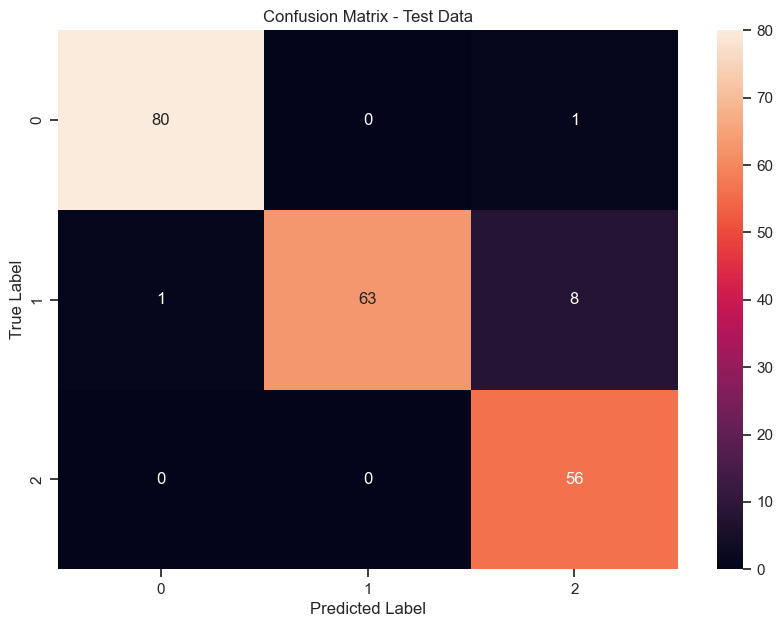

In [121]:
#confusion matrix
cm = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

COnclusion for SVM model:
The initial SVM model had decent performance with an accuracy of 0.84. It showed a balanced trade-off between precision and recall, resulting in an F1-Score of 0.83.
After tuning with both GridSearchCV and RandomizedSearchCV, the model's performance significantly improved, with a remarkable accuracy of 0.95, high precision, recall, and F1-Score, all at 0.95.
Overall, the SVM model demonstrates strong predictive power and performs exceptionally well after hyperparameter tuning. It excels at classifying milk quality into the "Grade" categories, achieving high accuracy, precision, recall, and F1-Score, all at 0.95. This suggests that the SVM model, when tuned properly, is a robust choice for milk quality prediction in the "Grade" column, which contains high, medium, and low categories.

# Naive Bayes

In [122]:
 from sklearn import model_selection, naive_bayes, metrics,feature_extraction

In [123]:
#grade has three classes low, medium and high denoted as 0,1 &2
data_no_outlier["Grade"] = data_no_outlier["Grade"].replace({"low": 0,"medium":1,"high": 2}).to_frame(name="Grade")


In [124]:
# X&Y
x=SS_cols
y_=data_no_outlier['Grade']

In [125]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y_,test_size=0.25,random_state=0)

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [127]:
bayes = naive_bayes.MultinomialNB()

In [128]:
#build the model
bayes.fit(x_train,y_train)

MultinomialNB()

In [129]:
#predicting y
y_pred_nb=bayes.predict(x_test)

In [183]:
#accuracy
accuracy_NaiveBayes=metrics.accuracy_score(y_test,y_pred_nb)
print("Accuracy: ",accuracy_NaiveBayes)

Accuracy:  0.5172413793103449


In [131]:
#classification report 
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.47      0.71      0.56       102
           1       0.58      0.71      0.64        89
           2       0.00      0.00      0.00        70

    accuracy                           0.52       261
   macro avg       0.35      0.47      0.40       261
weighted avg       0.38      0.52      0.44       261



C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


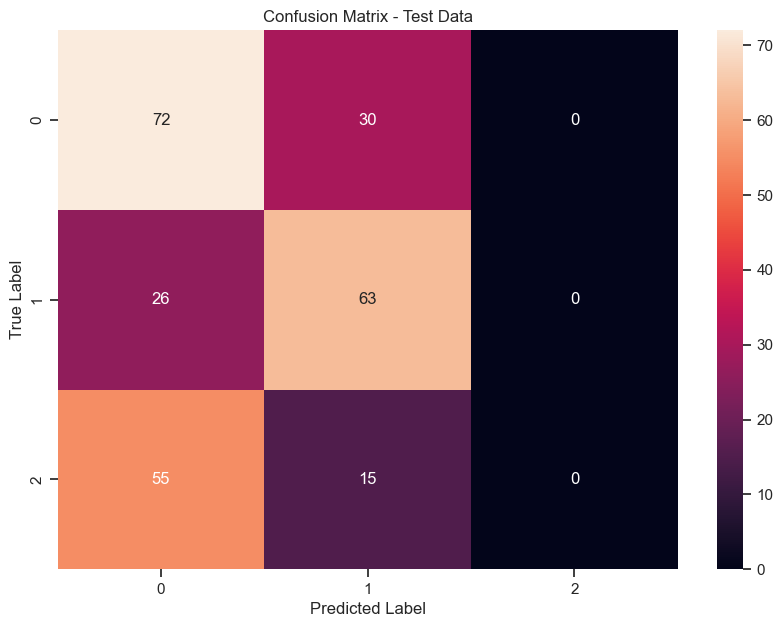

In [132]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred_nb)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

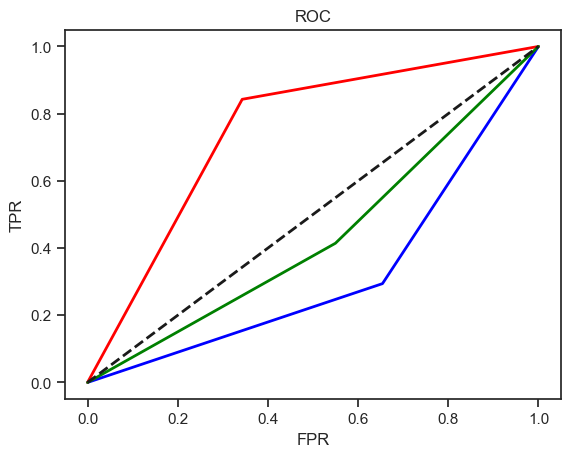

In [133]:
#roc curve
yb=label_binarize(y_, classes=[0,1,2])
nc = yb.shape[1] 
classifier = OneVsRestClassifier(bayes)
y_score=classifier.fit(x_train,y_train).predict(x_test)
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range (nc):
    fpr[i],tpr[i],_=roc_curve(y_test == i, y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])
plt.figure()
color=['blue','red','green']
for i, color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color, lw=2, label='ROC (area={:.2f}) for class {}'.format(roc_auc[i],data_no_outlier['Grade'][i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# Tuning

# GridSearchCV

In [134]:
 param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}


In [135]:
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [136]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [137]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 10, 'fit_prior': False}


In [138]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.6015325670498084


In [139]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.36      0.48       102
           1       0.60      0.76      0.67        89
           2       0.54      0.74      0.62        70

    accuracy                           0.60       261
   macro avg       0.62      0.62      0.59       261
weighted avg       0.63      0.60      0.59       261



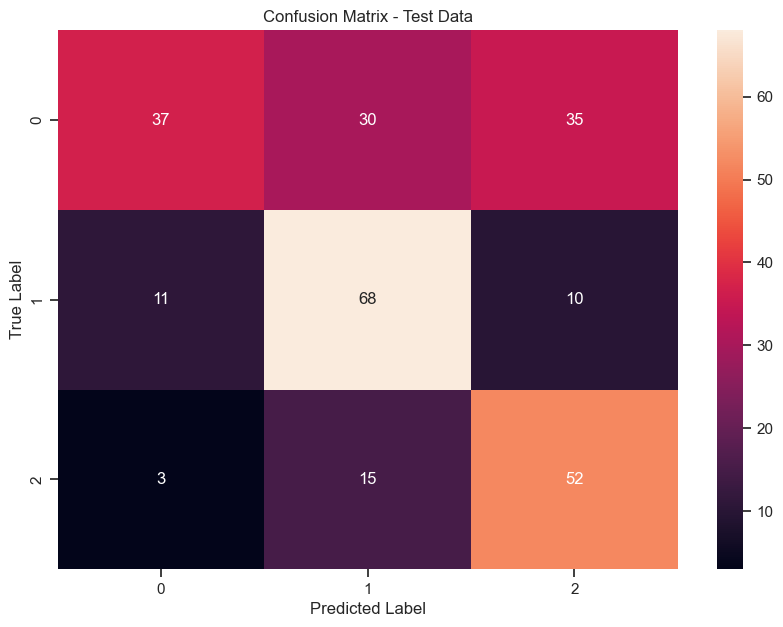

In [140]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RandomizedSearchCV

In [141]:
#Randomized Search 
from scipy.stats import uniform
param_dist = {
    'alpha': uniform(0.1, 2.0),  # Example: Uniform distribution for alpha
    'fit_prior':[True,False]
}

In [142]:
 bayes = naive_bayes.MultinomialNB()

In [143]:
x=scaler.fit_transform(x)

In [144]:
from sklearn.utils.validation import check_non_negative
check_non_negative(x, "MultinomialNB (input x)")

In [145]:
randomized_search = RandomizedSearchCV(bayes, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
randomized_search.fit(x, y_)  # X is your input data, y is your target labels

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000205D71882D0>,
                                        'fit_prior': [True, False]},
                   scoring='accuracy')

In [146]:
best_param = randomized_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 0.8370990254646876, 'fit_prior': False}


In [147]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [148]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.5977011494252874


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.40      0.52       102
           1       0.58      0.71      0.64        89
           2       0.53      0.74      0.62        70

    accuracy                           0.60       261
   macro avg       0.62      0.62      0.59       261
weighted avg       0.63      0.60      0.59       261



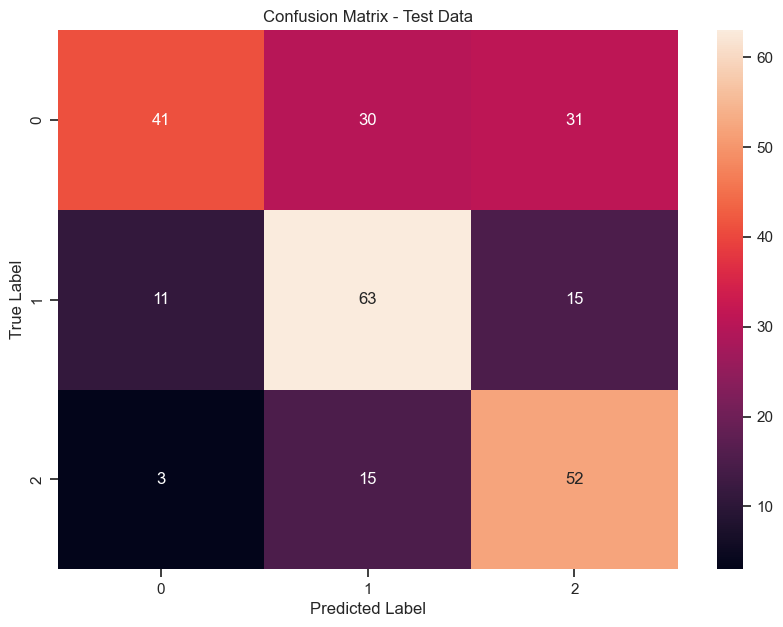

In [150]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Conclusion of Naive Bayes:
The initial Naive Bayes model had relatively low performance with an accuracy of 0.52. It showed a trade-off between precision and recall, resulting in an F1-Score of 0.40.

After tuning with both GridSearchCV and RandomizedSearchCV, the model's performance improved, with an accuracy of 0.60 and balanced precision and recall, resulting in an F1-Score of 0.59. Both tuning methods produced similar results.

Overall, the Naive Bayes model shows some improvement in performance after tuning, but it may still not be as effective as the SVM model or Logistic Regression model for milk quality prediction. However, the choice of model depends on various factors, including the nature of the data and the specific problem you are trying to solve.

# kNN

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.exceptions import NotFittedError

# Split the data into features (X) and target (y)
x_ = SS_cols
y1_ = data_no_outlier['Grade']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_, y1_, test_size=0.2, random_state=0)


In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [153]:
from sklearn.neighbors import KNeighborsClassifier

# Create the k-NN classifier with a specified number of neighbors (k)
k = 5  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [154]:
knn.score(X_test,Y_test)

0.9617224880382775

In [155]:
y_pred = knn.predict(X_test)
print("predicted",y_pred)

predicted [2 1 0 1 0 2 0 1 0 0 1 2 2 2 2 0 1 1 0 1 1 1 2 2 0 1 1 1 0 1 2 0 0 1 0 1 1
 0 2 2 1 1 0 2 1 0 0 0 2 1 2 0 1 0 0 0 0 2 1 2 2 0 1 0 2 0 0 1 1 0 0 2 0 1
 0 1 2 1 1 2 0 1 1 0 0 1 1 0 0 2 1 2 0 2 0 0 1 2 2 2 1 2 0 1 2 0 0 1 1 0 0
 0 0 2 1 1 2 0 1 2 0 0 0 2 1 0 1 0 1 0 0 1 0 1 2 1 0 2 1 0 1 0 1 0 0 0 0 1
 2 0 2 0 0 0 2 1 0 1 1 0 1 2 0 1 2 2 0 0 1 2 1 2 2 2 2 2 1 2 0 2 1 2 1 1 0
 0 0 0 1 0 1 1 1 0 0 1 0 2 2 1 0 1 1 0 2 0 1 0 2]


In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [184]:
accuracy_kNN = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy_kNN)

Accuracy: 0.9282296650717703


In [ ]:
 print(classification_report(Y_test, y_pred))

In [ ]:
cm=confusion_matrix(Y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

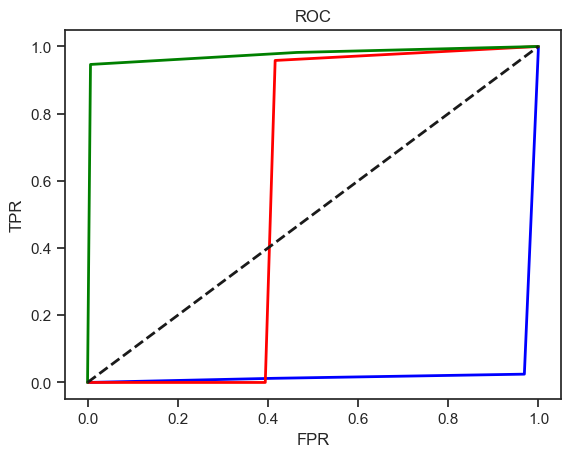

In [158]:
yb=label_binarize(y_, classes=[0,1,2])
nc = yb.shape[1] 
classifier = OneVsRestClassifier(knn)
y_score=classifier.fit(X_train,Y_train).predict(X_test)
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range (nc):
    fpr[i],tpr[i],_=roc_curve(Y_test == i, y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])
plt.figure()
color=['blue','red','green']
for i, color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color, lw=2, label='ROC (area={:.2f}) for class {}'.format(roc_auc[i],data_no_outlier['Grade'][i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# Tuning 

# Distance metrics

# 1)Euclidean

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier.fit(X_train, Y_train)  


KNeighborsClassifier(metric='euclidean')

In [161]:
y_pred = knn_classifier.predict(X_test)  # X_test: test features


In [162]:

accuracy = accuracy_score(Y_test, y_pred)  # For classification
print('accuracy:',accuracy)


accuracy: 0.9617224880382775


In [163]:
print(classification_report(Y_test, y_pred))  # For classification


              precision    recall  f1-score   support

           0       0.95      0.98      0.96        81
           1       0.96      0.96      0.96        72
           2       0.98      0.95      0.96        56

    accuracy                           0.96       209
   macro avg       0.96      0.96      0.96       209
weighted avg       0.96      0.96      0.96       209



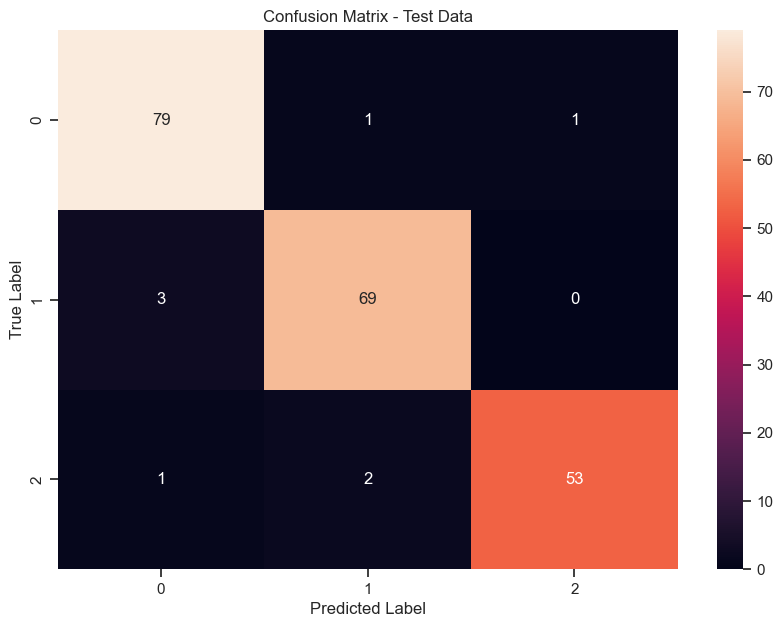

In [164]:
cm=confusion_matrix(Y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2)Manhatan

In [165]:

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

In [166]:
knn_classifier.fit(X_train, Y_train)  # X_train: training features, y_train: training labels

KNeighborsClassifier(metric='manhattan')

In [167]:
y_pred = knn_classifier.predict(X_test)  # X_test: test features

In [168]:
accuracy = accuracy_score(Y_test, y_pred)  # For classification
print('accuracy:',accuracy)

accuracy: 0.9760765550239234


In [169]:
print(classification_report(Y_test, y_pred))  # For classification

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        81
           1       0.97      0.99      0.98        72
           2       0.98      0.96      0.97        56

    accuracy                           0.98       209
   macro avg       0.98      0.98      0.98       209
weighted avg       0.98      0.98      0.98       209



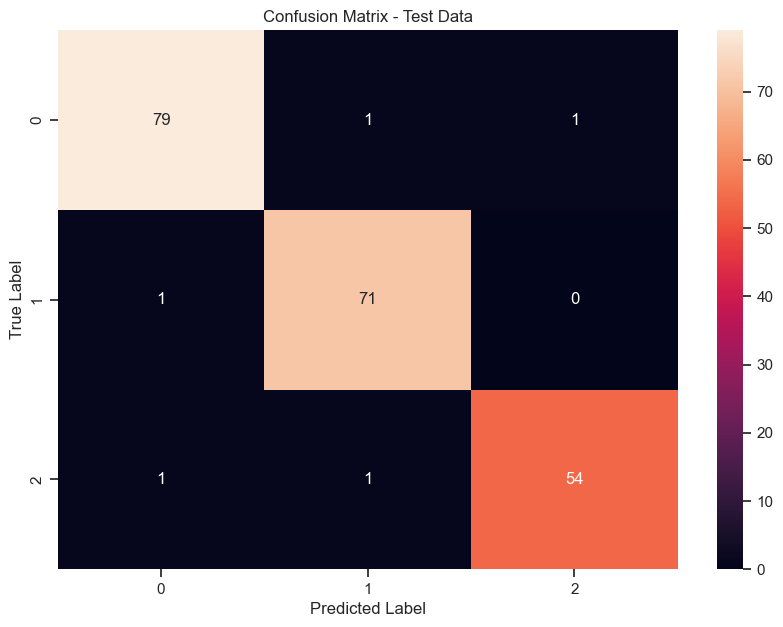

In [170]:
#confusion Matrix
cm=confusion_matrix(Y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3)Minkowsky

In [171]:

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  


In [172]:

from sklearn.neighbors import KNeighborsClassifier
knn_classifier.fit(X_train, Y_train)  

KNeighborsClassifier()

In [173]:
#prediction of y
y_pred = knn_classifier.predict(X_test)  # X_test: test fea

In [174]:
#accuracy
accuracy = accuracy_score(Y_test, y_pred)  # For classification
print('accuracy:',accuracy)

accuracy: 0.9617224880382775


In [175]:
#classificarion report
print(classification_report(Y_test, y_pred))  # For classification

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        81
           1       0.96      0.96      0.96        72
           2       0.98      0.95      0.96        56

    accuracy                           0.96       209
   macro avg       0.96      0.96      0.96       209
weighted avg       0.96      0.96      0.96       209



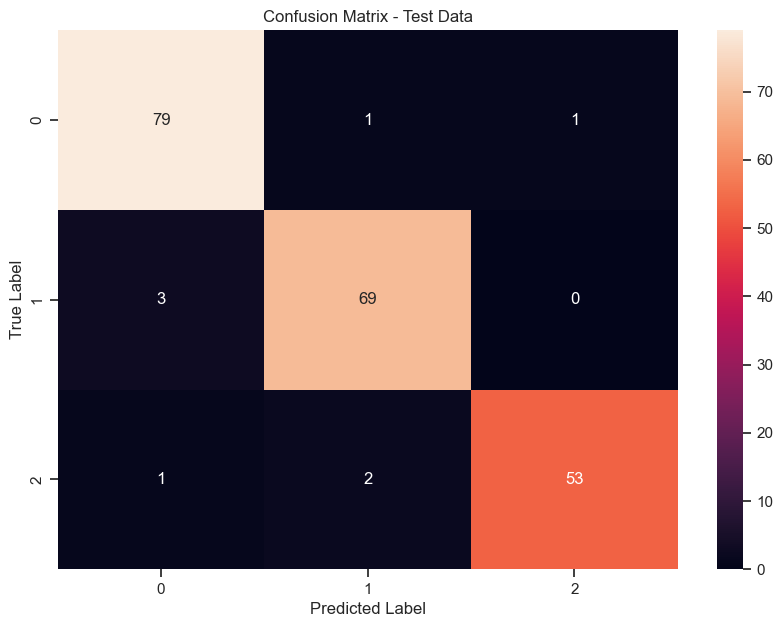

In [176]:
#confusion Matrix 
cm=confusion_matrix(Y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Elbow Method

In [177]:


# Create empty lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Define a range of k values to test (e.g., from 1 to 20)
k_range = range(1, 21)




In [178]:
for k in k_range:
    # Create a k-NN classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier with the training data
    knn_classifier.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(Y_test, y_pred)
    k_values.append(k)
    accuracies.append(accuracy)



In [179]:
#accuracy
print('Accuracy:',accuracy)

Accuracy: 0.9282296650717703


In [180]:
#classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        81
           1       0.92      0.99      0.95        72
           2       0.91      0.91      0.91        56

    accuracy                           0.93       209
   macro avg       0.93      0.93      0.93       209
weighted avg       0.93      0.93      0.93       209



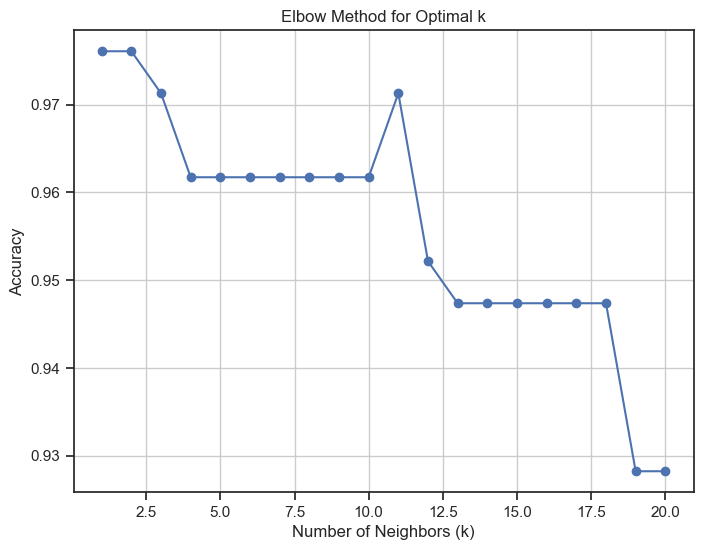

Optimal k: 1


In [181]:
# Plot the results to visualize the "Elbow"
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the optimal k (the one that gives the highest accuracy)
optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimal k: {optimal_k}')


# Validation curves

In [181]:
from sklearn.model_selection import validation_curve
# Define a range of 'k' values to test
k_values = range(1, 21)
# Load and prepare your training and test data (X_train, y_train, X_test, y_test)
# Create a k-NN classifier
knn_classifier = KNeighborsClassifier()

In [182]:
# Calculate training and test scores across the range of 'k' values
train_scores, test_scores = validation_curve(
    knn_classifier, X_train, Y_train, param_name="n_neighbors", param_range=k_values,
    cv=5, scoring="accuracy", n_jobs=-1  # Adjust 'cv' as needed
)

In [187]:
# Calculate the mean and standard deviation of the scores for each 'k'
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
print('train_scores_mean:',train_scores_mean)
print('train_scores_std:',train_scores_std)
print('test_scores_mean:',test_scores_mean)
print('test_scores_std:',test_scores_std)

train_scores_mean: [0.98199369 0.98649504 0.98529474 0.98079384 0.97779173 0.97689083
 0.97119053 0.97029323 0.96909113 0.96368663 0.95978722 0.96128737
 0.94868016 0.94958107 0.93848301 0.93578076 0.92376875 0.91867129
 0.90276123 0.89405387]
train_scores_std: [0.00284228 0.00133798 0.0011145  0.00256921 0.00174253 0.00309104
 0.00530569 0.00794113 0.00587665 0.00513722 0.00678467 0.00546537
 0.00555919 0.00459438 0.01184878 0.01148424 0.00681148 0.00852344
 0.00773608 0.01092766]
test_scores_mean: [0.97601183 0.98081668 0.98081668 0.98081668 0.96883342 0.964043
 0.95802612 0.95560205 0.94840199 0.94360436 0.93877787 0.94239232
 0.93761633 0.93641873 0.92678017 0.92198976 0.9088161  0.89917033
 0.88000866 0.87161821]
test_scores_std: [0.01605958 0.01029976 0.01029976 0.01029976 0.0194482  0.02539149
 0.01998808 0.01391469 0.01165941 0.01224648 0.0079242  0.00964941
 0.02120207 0.02085488 0.01481787 0.01552184 0.01889532 0.00950546
 0.02940427 0.03819352]


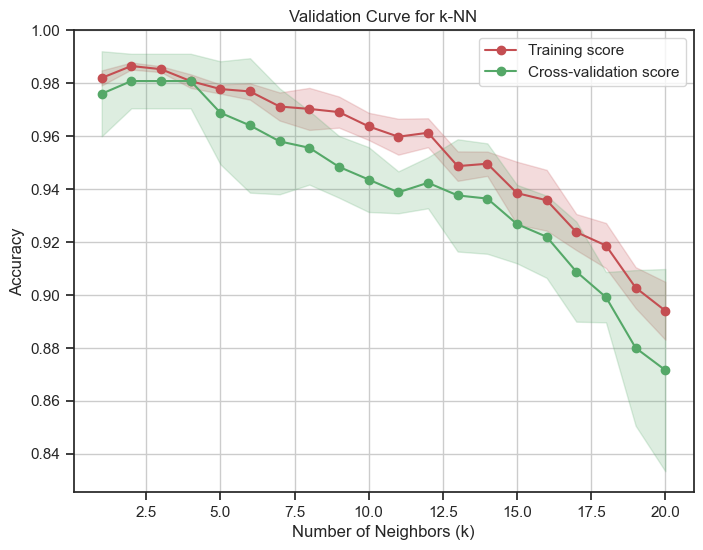

In [186]:
# Plot the validation curves
plt.figure(figsize=(8, 6))
plt.title("Validation Curve for k-NN")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(k_values, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.fill_between(k_values, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(k_values, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(k_values, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Conclusion for kNN model:
The k-NN model exhibited strong performance even before tuning, with an initial accuracy, precision, recall, and F1-Score of 0.96.
After tuning with different distance metrics, the model remained highly accurate, regardless of the metric used (Euclidean, Manhattan, or Minkowski).
The use of the Elbow Method identified an optimal 'k' of 1, suggesting that having just one neighbor for classification results in a good trade-off between bias and variance.
The model after the Elbow Method tuning achieved slightly lower accuracy and other metrics compared to the initial performance but still maintained a high level of predictive power (accuracy of 0.93).
Overall, the k-NN model, when properly tuned, performs very well for milk quality prediction on the "Grade" column, which contains high, medium, and low categories. It showcases remarkable accuracy and robustness, especially when utilizing the Manhattan distance metric and a low value of 'k' determined by the Elbow Method.

In [185]:

# Create a dictionary to store accuracy values for each model
df = {
    "Model": ["Linear Regression", "Logistic Regression", "SVM", "Naive Bayes", "k-NN"],
    "Accuracy": [r2, accuracy_logistics, accuracy_SVM, accuracy_NaiveBayes, accuracy_kNN]
}

# Create a Pandas DataFrame from the dictionary
accuracy_df = pd.DataFrame(df)

# Display the DataFrame as a table
accuracy_df


,Model,Accuracy
0,Linear Regression,0.344006
1,Logistic Regression,0.870813
2,SVM,0.928230
3,Naive Bayes,0.517241
4,k-NN,0.928230
